This notebook requires:
* jupyter
* nglview
* matplotlib
* seaborn
* mdtraj

Copy data from cluster with:
```
scp -rC chodera@hal.cbio.mskcc.org:/cbio/jclab/projects/behrj/AURKA_UMN/output-"*"/data/"*"_"*"_284-225_SB_total.npy .
```

for (projects 11414, 11418, 11419, 11423)
```
mdconvert -o trajectory.pdb -i 0 trajectory.h5
mdconvert -o trajectory.dcd trajectory.h5
```

In [6]:
%matplotlib inline

In [7]:
import nglview
import mdtraj

In [8]:
def retrieve_trajectory(project, run, clone):
    print("Retrieving project %d run %d clone %d..." % (project, run, clone))
    # Copy the trajectory locally.
    import os
    os.system("scp -C chodera@hal.cbio.mskcc.org:/cbio/jclab/projects/fah/fah-data/munged3/no-solvent/%d/run%d-clone%d.h5 trajectory.h5" % (project, run, clone))
    # Load and return it.
    import mdtraj as md
    traj = md.load('trajectory.h5')
    # Image trajectory
    print('Imaging molecules...')
    traj.image_molecules(inplace=True)
    # Align trajectory
    print('Aligning to first frame...')
    traj.superpose(traj,0)
    print('Done.')
    return traj    

In [15]:
def view_trajectory(traj):
    import nglview as nv
    view = nglview.show_mdtraj(traj.superpose(traj,0))
    #view.component_0.clear_representations()
    #view.component_0.add_cartoon()
    view.add_representation('cartoon', selection='protein', color='green')
    view.add_representation('cartoon', selection='1-42', color='yellow')
    #activation_loop = traj.top.select("(resSeq >= 281) and (resSeq <= 293)")
    DFG_loop = '274-276'
    activation_loop = '281-293'
    view.add_representation('cartoon', selection=activation_loop, color='red')    
    view.add_representation('licorice', selection=DFG_loop, color='orange')    
    view.add_representation('licorice', selection='288', color='purple')    
    view.add_representation('licorice', selection='284', color='blue')    
    view.add_representation('licorice', selection='225', color='blue')    
    return view

In [10]:
project = 11418
run = 0

# find clone with maximum range
import numpy as np
dist = np.load('%d_%d_284-225_SB_total.npy' % (project, run))
dist = dist[:,:,0]
nclones = dist.shape[0]
dist_range = dist.max(1) - dist.min(1)
clone = np.argmax(dist_range)
print(clone)
dist_range

0


array([ 1.84588623,  0.89477754,  1.4230752 ,  1.37432861,  1.72125435,
        1.20619512,  1.32856297,  1.12289524,  1.29979396,  1.28352094,
        1.21109509,  1.20704603,  1.1409204 ,  0.95874262,  1.27369094,
        1.67899585,  1.04992366,  1.09516358,  1.15380406,  1.30938935,
        1.51763964,  1.53876829,  1.22887039,  1.30286717,  1.44792557,
        1.46949124,  0.90853786,  1.35938978,  1.25983167,  1.24318957,
        0.93902826,  1.05955768,  1.31215453,  1.56535673,  1.16514754,
        1.1187346 ,  1.27911377,  1.26278973,  1.30418324,  1.21268106,
        1.09729838,  1.38353729,  1.29362321,  0.92239261,  1.32041502,
        1.40528321,  1.22035456,  1.4692471 ,  1.3300271 ,  1.29697156], dtype=float32)

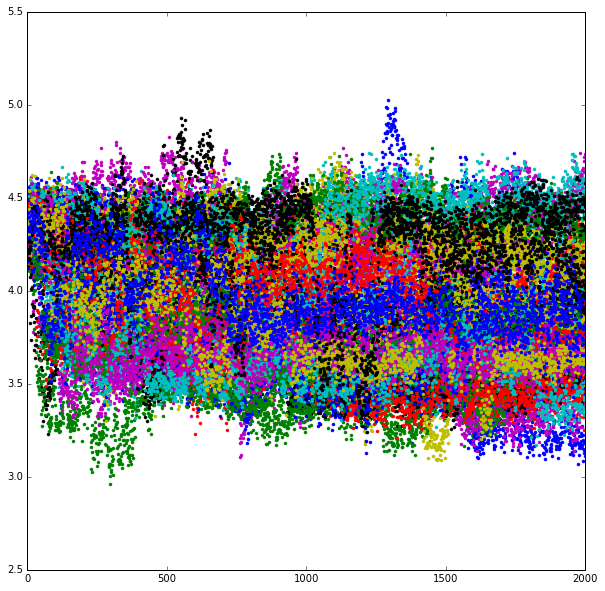

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(dist.T,'.');

In [12]:
# AurA WT +Tpx2
#traj = retrieve_trajectory(11414, 0, 38)
# AurA WT -Tpx2
traj = retrieve_trajectory(11418, 0, 0)

Retrieving project 11418 run 0 clone 0...
Imaging molecules...
Aligning to first frame...
Done.


In [13]:
traj[0].save('trajectory.pdb')
traj.save('trajectory.dcd')

In [16]:
view_trajectory(traj)